In [8]:
!mkdir graph
!mkdir plot_G
!mkdir experiments_plt
!mkdir graph/test
!mkdir graph/train

mkdir: cannot create directory ‘graph’: File exists
mkdir: cannot create directory ‘plot_G’: File exists
mkdir: cannot create directory ‘experiments_plt’: File exists
mkdir: cannot create directory ‘graph/test’: File exists
mkdir: cannot create directory ‘graph/train’: File exists


In [9]:
import csv
import pandas as pd
import numpy as np
from tqdm import tqdm

In [10]:
# 讀csv，回傳data frame
def DataLoader(file_name):
    df=pd.read_csv(file_name)
    print(df.shape)
    print(df.columns)
    return df

In [11]:

df=DataLoader('creditcard.csv')


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [13]:
# 10:1的資料
def data_sampling(df):
    # print(df)
    fraud_data=df[df['Class']==1]
    normal_data=df[df['Class']==0].sample(n=len(fraud_data)*10,random_state=42)
    
    selected_df_eval=pd.concat([normal_data[:int(len(normal_data)*0.5)],fraud_data[:int(len(fraud_data)*0.5)]])
    selected_df_train=pd.concat([normal_data[int(len(normal_data)*0.5):],fraud_data[int(len(fraud_data)*0.5):]])
    
    selected_df_train.reset_index(drop=True,inplace=True)
    selected_df_eval.reset_index(drop=True,inplace=True)
    
    return selected_df_train, selected_df_eval

In [14]:
df_train, df_eval=data_sampling(df)

In [15]:
# 標準化
def data_standardization(df):
    # 假設 df 是你的 DataFrame，columns 是要標準化的欄位名稱列表
    columns_to_normalize = ['Time', 'Amount']  # 填入要標準化的欄位名稱
    # 初始化 StandardScaler 物件
    scaler = StandardScaler()
    # 對指定列進行標準化
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df



In [16]:
df_train=data_standardization(df_train)
df_eval=data_standardization(df_eval)

In [17]:
df_train=df_train.drop('Time', axis=1)
df_eval=df_eval.drop('Time', axis=1)

In [18]:
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.856278,-0.656940,-3.544856,-0.708945,2.754094,2.958646,0.220757,0.523602,0.018137,0.113232,...,0.171341,0.283230,-0.101464,0.797428,0.339421,0.834470,-0.127833,-0.070559,0.191774,0
1,-0.291996,1.203453,0.606774,0.804202,-0.015853,-0.332267,0.269674,0.406551,-0.993726,-0.207271,...,0.207567,0.505082,-0.116868,0.024480,-0.107718,-0.326300,-0.044924,-0.030973,-0.340258,0
2,-0.822794,-0.882761,-0.059921,-3.563277,1.119729,3.644788,0.692235,0.379567,-2.715679,0.868145,...,-0.694102,-1.798370,0.167662,0.903196,0.276168,-0.741111,-0.182870,-0.173347,0.721310,0
3,-0.397195,1.094436,-0.564145,0.727289,0.508478,-1.013828,1.045787,0.204839,-0.455623,-0.490504,...,0.218438,0.524905,-0.097513,-0.137886,-0.311263,-0.535915,0.072928,0.136157,-0.233699,0
4,1.004211,0.005801,1.410018,1.375881,-0.741639,0.297069,-0.734505,0.215221,1.477864,-0.259607,...,0.068933,0.393614,0.014016,0.152068,0.170970,-0.403956,0.041086,0.029306,-0.183591,0


In [19]:
def calculate_cosine_similarity(df, type):
    features=df.drop("Class",axis=1)
    cos_sim=cosine_similarity(features)
    np.save("cos_sim_"+type+".npy",cos_sim)
    print("Cosine similarity calculation completed and saved.") 



In [20]:
calculate_cosine_similarity(df_train, "train")
calculate_cosine_similarity(df_eval, "eval")

Cosine similarity calculation completed and saved.
Cosine similarity calculation completed and saved.


In [21]:
cos_sim_train=np.load("cos_sim_train.npy")
cos_sim_eval=np.load("cos_sim_eval.npy")

In [22]:
def cos_sim_describe(cos_sim):
    # 計算每一列的統計量
    max_values = np.max(cos_sim, axis=1)
    min_values = np.min(cos_sim, axis=1)
    median_values = np.median(cos_sim, axis=1)
    mean_values = np.mean(cos_sim, axis=1)
    std_values = np.std(cos_sim, axis=1)

    # 對這些統計量再次計算統計量
    stats_max = np.max(max_values)
    stats_min = np.min(min_values)
    stats_median = np.median(median_values)
    stats_mean = np.mean(mean_values)
    stats_std = np.std(std_values)

    # 印出結果
    print("Statistics of row statistics:")
    print("  Max:", stats_max)
    print("  Min:", stats_min)
    print("  Median:", stats_median)
    print("  Mean:", stats_mean)
    print("  Std:", stats_std)
    cos_sim_dict={'max':stats_max,'min':stats_min,'median':stats_median
                  ,'mean':stats_mean,'std':stats_std}
    return cos_sim_dict

In [23]:
cos_sim_dict_train=cos_sim_describe(cos_sim_train)
print(cos_sim_dict_train)

Statistics of row statistics:
  Max: 1.0000000000000009
  Min: -0.8646520723968542
  Median: -0.02001593235914521
  Mean: 0.009097611393020816
  Std: 0.0309385517236969
{'max': 1.0000000000000009, 'min': -0.8646520723968542, 'median': -0.02001593235914521, 'mean': 0.009097611393020816, 'std': 0.0309385517236969}


In [24]:
cos_sim_dict_eval =cos_sim_describe(cos_sim_eval)
print(cos_sim_dict_eval)

Statistics of row statistics:
  Max: 1.0000000000000009
  Min: -0.8468720478869846
  Median: -0.02354050909169116
  Mean: 0.007809611367936981
  Std: 0.03058889019504797
{'max': 1.0000000000000009, 'min': -0.8468720478869846, 'median': -0.02354050909169116, 'mean': 0.007809611367936981, 'std': 0.03058889019504797}


In [25]:
## graph construction
import networkx as nx

In [26]:
def graph_construction(cos_sim,df,threshold):
    G=nx.Graph()
    for i in tqdm(range(cos_sim.shape[0]),desc="Add nodes into G..."):
        node_name=i
        feature=(df.iloc[i]).to_dict()
        G.add_node(node_name,**feature)

    for i in tqdm(range(cos_sim.shape[0]),desc="Graph Construction..."):
        for j in range(i+1,cos_sim.shape[1]):
            if cos_sim[i,j]>threshold:
                G.add_edge(i,j)
    return G


In [27]:
from collections import Counter
def graph_describe(G,round_digit):
    density=2*G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1))
    # 获取节点的度数
    degrees = [degree for node, degree in G.degree()]
    # 计算统计指标
    mean_degree = np.mean(degrees)
    median_degree = np.median(degrees)
    std_degree = np.std(degrees)
    max_degree = np.max(degrees)
    min_degree = np.min(degrees)
    
    edge_consistency={}
    fraud_node_set=set()
    for edge in tqdm(G.edges(),desc="Check edge consistent..."):
        node1_class=G.nodes[edge[0]]['Class']
        node2_class=G.nodes[edge[1]]['Class']

        if node1_class==node2_class:
            edge_consistency[edge]=1
        else:
            edge_consistency[edge]=0

    value_counts=Counter(edge_consistency.values())
    ratio=value_counts[0]/G.number_of_edges()
    return G.number_of_nodes(),G.number_of_edges(),density,mean_degree,median_degree,std_degree,max_degree,min_degree,ratio

In [28]:
import pickle

def save_graph(name, G):
    # save graph object to file
    pickle.dump(G, open("graph/"+name+'.pickle', 'wb'))

def load_graph(name, G):
    # load graph object from file
    G = pickle.load(open("graph/"+name+'.pickle', 'rb'))
    return G

In [29]:
def data_construction(type, cos_sim, cos_sim_dict_train):
    data_dic={'threshold':[],'number_of_nodes':[],'number_of_edges':[],'density':[]
              ,'mean_degree':[],'median_degree':[],'std_of_degree':[],'max_degree':[]
              ,'min_degree':[],'ratio_of_heterogeneous':[]}
    graph=[]
    for factor in range(31):
        # threshold
        threshold=cos_sim_dict_train['median']+factor*cos_sim_dict_train['std']
        data_dic['threshold'].append(threshold)
        G=graph_construction(cos_sim,df,threshold)
        graph.append(G)
        # 存graph
        save_graph(type+"/"+str(threshold), G)
        
        non,noe,d,meand,medd,stdd,maxd,mind,ratio=graph_describe(G,3)
        data_dic['number_of_nodes'].append(non)
        data_dic['number_of_edges'].append(noe)
        data_dic['density'].append(d)
        data_dic['mean_degree'].append(meand)
        data_dic['median_degree'].append(medd)
        data_dic['std_of_degree'].append(stdd)
        data_dic['max_degree'].append(maxd)
        data_dic['min_degree'].append(mind)
        data_dic['ratio_of_heterogeneous'].append(ratio)
    
    return graph, data_dic



In [30]:
graph, data_dic = data_construction("train", cos_sim_train, cos_sim_dict_train)
# !!!!test也用train的相似度去計算threshold
graph_test, data_dic_test = data_construction("test", cos_sim_eval, cos_sim_dict_train)

Check edge consistent...: 100%|██████████| 7179/7179 [00:00<00:00, 698256.35it/s]


In [31]:
# 存成data.json
import json
def save_data_dic(type, data_dic):
    for key in data_dic:
        if isinstance(data_dic[key][0], np.int32) or isinstance(data_dic[key][0], np.int64):
            data_dic[key]=[int(num) for num in data_dic[key]]
        elif isinstance(data_dic[key][0], np.float64):
            data_dic[key]=[float(num) for num in data_dic[key]]
    json_data=json.dumps(data_dic,indent=4)
    with open('data_'+type+'.json','w') as json_file:
        json_file.write(json_data)
    with open("data.json",'r') as json_file:
        data_dic=json.load(json_file)
    # type_list=[]
    # for key in data_dic:
    #     print(f"{key}:")
    #     print([round(num,3) for num in data_dic[key]])
    #     print(f"type:{type(data_dic[key][0])}")
    #     type_list.append(type(data_dic[key][0]))
    #     print()
    # print(type_list)

In [32]:
data_dic

{'threshold': [-0.02001593235914521,
  0.010922619364551689,
  0.04186117108824859,
  0.07279972281194548,
  0.10373827453564238,
  0.1346768262593393,
  0.1656153779830362,
  0.1965539297067331,
  0.22749248143043,
  0.25843103315412685,
  0.28936958487782377,
  0.3203081366015207,
  0.35124668832521755,
  0.38218524004891447,
  0.4131237917726114,
  0.44406234349630824,
  0.47500089522000516,
  0.5059394469437021,
  0.5368779986673989,
  0.5678165503910959,
  0.5987551021147928,
  0.6296936538384896,
  0.6606322055621866,
  0.6915707572858835,
  0.7225093090095803,
  0.7534478607332773,
  0.7843864124569742,
  0.815324964180671,
  0.846263515904368,
  0.8772020676280649,
  0.9081406193517617],
 'number_of_nodes': [2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706],
 'number_of_edges': [180165

In [33]:
data_dic_test

{'threshold': [-0.02001593235914521,
  0.010922619364551689,
  0.04186117108824859,
  0.07279972281194548,
  0.10373827453564238,
  0.1346768262593393,
  0.1656153779830362,
  0.1965539297067331,
  0.22749248143043,
  0.25843103315412685,
  0.28936958487782377,
  0.3203081366015207,
  0.35124668832521755,
  0.38218524004891447,
  0.4131237917726114,
  0.44406234349630824,
  0.47500089522000516,
  0.5059394469437021,
  0.5368779986673989,
  0.5678165503910959,
  0.5987551021147928,
  0.6296936538384896,
  0.6606322055621866,
  0.6915707572858835,
  0.7225093090095803,
  0.7534478607332773,
  0.7843864124569742,
  0.815324964180671,
  0.846263515904368,
  0.8772020676280649,
  0.9081406193517617],
 'number_of_nodes': [2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706,
  2706],
 'number_of_edges': [178391

In [34]:
save_data_dic("train", data_dic)
save_data_dic("test", data_dic_test)

In [35]:
# # 圖
# import matplotlib.pyplot as plt
# import random
# for idx,G in tqdm(enumerate(graph),desc="plot..."):
#     subset_nodes = random.sample(G.nodes(), k=30)
#     subgraph = G.subgraph(subset_nodes)

#     # 定義顏色映射
#     color_map = {0: 'blue', 1: 'red'}

#     # 根據類別為節點指定顏色
#     node_colors = [color_map[G.nodes[node]['Class']] for node in subgraph.nodes()]

#     # 繪製子圖
#     plt.figure(figsize=(10, 8))
#     nx.draw(subgraph, with_labels=True, node_color=node_colors)
#     plt.title(f"Subraph Visualization with Different Colors:\nThreshold = median + {idx} std ")
#     # 保存图为文件
#     plt.savefig(f'./plot_G/median_add_{idx}_std.png')  # 将图保存为 PNG 格式
#     # plt.show()

In [36]:
# ## plot graph construction experiments result
# x=data_dic['threshold']
# for key in data_dic:
#     if key=='graph' or key=='threshold' or key=='number_of_nodes':
#         continue
#     y=data_dic[key]
#     plt.figure()
#     plt.plot(x,y)
#     plt.title(f"Threshold v.s {key}")
#     plt.xlabel("Threshold")
#     plt.ylabel(f"{key}")
#     plt.savefig(f"./experiments_plt/threshold_vs_{key}")
#     plt.show()
    
    

In [37]:
# node_features = {node: data for node, data in G.nodes(data=True)}
# print(node_features[0])
# print(list(node_features[0].values()))

In [38]:
import os
import pickle
def read_graph(type):
    # 讀所有graph
    folder_path = './graph/'+type+"/"
    graph_dic = {}
    # 遍歷資料夾下的所有檔案
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        # print(file_path)
        # 檢查是否是.pkl檔案
        if filename.endswith(".pickle"):
            # 讀取.pkl檔案
            try:
                with open(file_path, "rb") as file:
                    G = pickle.load(file)
                    # 在這裡可以對讀取的資料進行處理
                    print(f"從 '{file_path}' 讀取到資料：{G}")
                    threshold = float(os.path.splitext(filename)[0])
                    graph_dic[threshold] = G
            except Exception as e:
                print(f"讀取 '{file_path}' 時發生錯誤：{e}")
    return graph_dic


In [39]:
graph_dic = read_graph("train")
graph_dic_test = read_graph("test")

從 './graph/train/0.5368779986673989.pickle' 讀取到資料：Graph with 2706 nodes and 133757 edges
從 './graph/train/0.1965539297067331.pickle' 讀取到資料：Graph with 2706 nodes and 753604 edges
從 './graph/train/0.9081406193517617.pickle' 讀取到資料：Graph with 2706 nodes and 5237 edges
從 './graph/train/0.4131237917726114.pickle' 讀取到資料：Graph with 2706 nodes and 267653 edges
從 './graph/train/0.846263515904368.pickle' 讀取到資料：Graph with 2706 nodes and 12979 edges
從 './graph/train/0.1346768262593393.pickle' 讀取到資料：Graph with 2706 nodes and 976987 edges
從 './graph/train/0.04186117108824859.pickle' 讀取到資料：Graph with 2706 nodes and 1414085 edges
從 './graph/train/0.25843103315412685.pickle' 讀取到資料：Graph with 2706 nodes and 572932 edges
從 './graph/train/0.010922619364551689.pickle' 讀取到資料：Graph with 2706 nodes and 1596987 edges
從 './graph/train/0.28936958487782377.pickle' 讀取到資料：Graph with 2706 nodes and 496599 edges
從 './graph/train/0.5678165503910959.pickle' 讀取到資料：Graph with 2706 nodes and 110543 edges
從 './graph/train/-

In [40]:
print(graph_dic)
print(graph_dic_test)

{0.5368779986673989: <networkx.classes.graph.Graph object at 0x7f3b2a635e20>, 0.1965539297067331: <networkx.classes.graph.Graph object at 0x7f3786f3b640>, 0.9081406193517617: <networkx.classes.graph.Graph object at 0x7f34f1ba4250>, 0.4131237917726114: <networkx.classes.graph.Graph object at 0x7f34f1ba4760>, 0.846263515904368: <networkx.classes.graph.Graph object at 0x7f34f1ba4490>, 0.1346768262593393: <networkx.classes.graph.Graph object at 0x7f34f1ba4370>, 0.04186117108824859: <networkx.classes.graph.Graph object at 0x7f34f1ba4940>, 0.25843103315412685: <networkx.classes.graph.Graph object at 0x7f34f1ba4910>, 0.010922619364551689: <networkx.classes.graph.Graph object at 0x7f34f1ba4fd0>, 0.28936958487782377: <networkx.classes.graph.Graph object at 0x7f34f1ba4c40>, 0.5678165503910959: <networkx.classes.graph.Graph object at 0x7f34f1ba4520>, -0.02001593235914521: <networkx.classes.graph.Graph object at 0x7f34f1ba46d0>, 0.7843864124569742: <networkx.classes.graph.Graph object at 0x7f34f1b

In [41]:
# networkx graph 轉pytorch Data
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GATConv

def G_to_data(graph_dic):
    all_data = []
    for threshold in tqdm(sorted(graph_dic.keys())):
        G = graph_dic[threshold]
        x, y, edge_index = [], [], []
        for node in G.nodes():
            x.append(list(G.nodes[node].values())[:-1])
            y.append(list(G.nodes[node].values())[-1])
    
        x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.long)
        edge_index = torch.tensor(list(G.edges)).t().contiguous()
    
        data = Data(x=x, edge_index=edge_index, y=y)
        data['threshold'] = threshold
        all_data.append(data)
    return all_data

In [42]:
all_data = G_to_data(graph_dic)
all_data_test = G_to_data(graph_dic_test)

  0%|          | 0/31 [00:00<?, ?it/s]/tmp/ipykernel_39055/572078566.py:16: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  y = torch.tensor(y, dtype=torch.long)
100%|██████████| 31/31 [00:07<00:00,  4.30it/s]


In [43]:
print(all_data)

[Data(x=[2706, 30], edge_index=[2, 1801655], y=[2706], threshold=-0.02001593235914521), Data(x=[2706, 30], edge_index=[2, 1596987], y=[2706], threshold=0.010922619364551689), Data(x=[2706, 30], edge_index=[2, 1414085], y=[2706], threshold=0.04186117108824859), Data(x=[2706, 30], edge_index=[2, 1251252], y=[2706], threshold=0.07279972281194548), Data(x=[2706, 30], edge_index=[2, 1106437], y=[2706], threshold=0.10373827453564238), Data(x=[2706, 30], edge_index=[2, 976987], y=[2706], threshold=0.1346768262593393), Data(x=[2706, 30], edge_index=[2, 859466], y=[2706], threshold=0.1656153779830362), Data(x=[2706, 30], edge_index=[2, 753604], y=[2706], threshold=0.1965539297067331), Data(x=[2706, 30], edge_index=[2, 658264], y=[2706], threshold=0.22749248143043), Data(x=[2706, 30], edge_index=[2, 572932], y=[2706], threshold=0.25843103315412685), Data(x=[2706, 30], edge_index=[2, 496599], y=[2706], threshold=0.28936958487782377), Data(x=[2706, 30], edge_index=[2, 428550], y=[2706], threshold=

In [44]:
# gat
from torch_geometric.nn import GATConv
import torch.nn.functional as F
class Encoder_GAT(torch.nn.Module):
    def __init__(self, num_heads, input_dim, hidden_dim, output_dim, num_layers):
        super(Encoder_GAT, self).__init__()
        self.num_layers = num_layers
        self.convs = torch.nn.ModuleList()
        for i in range(self.num_layers-1):
            if i:
                conv = GATConv(hidden_dim * num_heads, hidden_dim, heads=num_heads)
            else:
                conv = GATConv(input_dim, hidden_dim, heads=num_heads)

            self.convs.append(conv)
            
        if self.num_layers ==1:
            conv = GATConv(input_dim, output_dim)
            self.convs.append(conv)
        elif self.num_layers >1:
            conv = GATConv(hidden_dim * num_heads, output_dim)
            self.convs.append(conv)

    def forward(self, x, edge_index):
        xs = []
        for i in range(self.num_layers):
            x = F.relu(self.convs[i](x, edge_index))
        return x

In [45]:
# model (gat + linear)
import torch.nn as nn
import torch.nn.functional as F
class myGNN(nn.Module):
    def __init__(self, enc_num_heads, enc_input_dim, enc_hidden_dim, enc_num_layers, linear_output_dim):
        super(myGNN, self).__init__()
        # GAT(input、output大小一樣)
        self.encoder_neighbor = Encoder_GAT(enc_num_heads, enc_input_dim, enc_hidden_dim, enc_input_dim, enc_num_layers)
        # linear層
        self.proj_head_neighbor = nn.Linear(enc_input_dim, linear_output_dim)
        self.proj_head_ego = nn.Linear(enc_input_dim, linear_output_dim)

        self.init_emb()
    # embedding初始化
    def init_emb(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight.data)
                # BIASE初始化為0
                if m.bias is not None:
                    m.bias.data.fill_(0.0)
    @staticmethod
    def negative_sample(h_ego, h_neighbor):
        # 返回一个0~n-1的數組，隨機打散
        perm = torch.randperm(h_ego.shape[0])
        # 打亂，作ego-ego negative
        h_ego_neg = h_ego[perm]
        # 打亂，作ego-neigbor negative
        h_neighbor_neg = h_neighbor[perm]
        return h_ego_neg, h_neighbor_neg

    @staticmethod
    def discriminator(x1, x2):
        return -1 * F.cosine_similarity(x1, x2, dim=1).unsqueeze(0)

    def forward(self, x, edge_index):
        # GAT
        h_neighbor = self.encoder_neighbor(x, edge_index)
        h_neighbor = self.proj_head_neighbor(h_neighbor)
        # linear
        h_ego = self.proj_head_ego(x)

        return h_ego, h_neighbor

In [72]:
pyod.utils.utility.precision_n_scores([1, 1, 1, 0, 0], [40, 1, 1, 10, 2], n=None)

0.3333333333333333

In [53]:
# train & eval model
import time
from sklearn.metrics import roc_auc_score
import json
import copy
import os
import numpy as np
import torch
import pyod

def rescale(x):
    return ((x + 1) / 2)*(1-(2e-06)) + 1e-06


def train_model(args, data, model, optimizer, loss_function):
    stats = {
        "best_loss": 1e9,
        "best_epoch": -1,
    }
    model.train()

    label_ones =  torch.ones(1, data.x.shape[0]).to(args["device"])
    label_zeros = torch.zeros(1, data.x.shape[0]).to(args["device"])

    for epoch in tqdm(range(args['num_epoch'])):
        optimizer.zero_grad()
        data = data.to(args['device'])
        # forward(gat+linear)
        h_ego, h_neighbor = model(data.x, data.edge_index)
        h_ego_neg, h_neighbor_neg  = model.negative_sample(h_ego, h_neighbor)
        # 算 -c
        c_neighbor_pos = model.discriminator(h_ego, h_neighbor)
        c_neighbor_neg = model.discriminator(h_ego, h_neighbor_neg)
        c_ego_neg = model.discriminator(h_ego, h_ego_neg)
        # rescal(x) = (x-(-1)) / 2，使介於0~1(原介於-1~1)
        score_pos = rescale(c_neighbor_pos)
        score_aug = rescale(c_neighbor_neg)
        score_nod = rescale(c_ego_neg)
        
        # BCE loss
        # ego-neighbor postive, ego-neighbor negative, ego-ego negative
        loss_pos = loss_function(score_pos, label_zeros)
        loss_aug = loss_function(score_aug, label_ones)
        loss_nod = loss_function(score_nod, label_ones)
        
        loss_sum = loss_pos + args['alpha'] * loss_aug  + args['gamma'] * loss_nod

        loss_sum.backward()
        # 只用postive判斷好壞
        if loss_pos < stats["best_loss"]:
            stats["best_loss"] = loss_pos.item()
            stats["best_epoch"] = epoch
            torch.save(model.state_dict(), args['state_path'])
        optimizer.step()

        # if epoch % 100 ==0:
        #     eval_model(args, data, model)


    return stats

def eval_model(args, data, model):
    model.eval()
    with torch.no_grad():
        data = data.to(args["device"])
        h_ego, h_neighbor = model(data.x, data.edge_index)
        c_neighbor_pos = model.discriminator(h_ego, h_neighbor)
        
        y_true = (data.y).detach().cpu().tolist()
        y_score = c_neighbor_pos.squeeze().detach().cpu().tolist()
        auc = roc_auc_score(y_true, y_score)
        precision_n_score = pyod.utils.utility.precision_n_scores(y_true, y_score, n=None)
        
    return auc, precision_n_score


In [57]:
# run
import random

def set_random_seeds(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def run_experiment(args, data_train, data_test):
    set_random_seeds(args['seed'])
    # Create model
    model = myGNN(args['enc_num_heads'], args['enc_input_dim'], args['enc_hidden_dim'],  args['enc_num_layers'], args["linear_output_dim"])
    model.to(args['device'])
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=args['lr'],
                                 weight_decay=args['weight_decay'])
    loss_function = torch.nn.BCELoss()
    # train
    stats = train_model(
        args, data, model, optimizer, loss_function
    )
    # eval
    model.load_state_dict(torch.load(args["state_path"]))
    auc, precision_n_score = eval_model(args, data_test, model)
    stats["AUC"] = auc
    stats["Precision@n"] = precision_n_score

    return model, stats

In [58]:
# 參數
args = {"lr": 5e-4, 
        "alpha": 0.3, 
        "gamma": 0.4, 
        "state_path": "model.pkl", 
        "device": "cuda:0", 
        "seed": 1, 
        "num_epoch": 500, 
        "weight_decay": 0.0, 
        "enc_num_heads": 3, 
        "enc_input_dim":all_data[0].x.shape[1], 
        "enc_hidden_dim": 32, 
        "linear_output_dim": 64,
        "enc_num_layers":1,
       }

In [63]:
auc_dict = {}
precision_n_dict = {}
for data, data_test in zip(all_data, all_data_test): 
    print("----------threshod = "+str(data.threshold)+"-----------------")
    model, stats = run_experiment(args, data, data_test)
    auc_dict[data.threshold]= stats["AUC"]
    precision_n_dict[data.threshold]= stats["Precision@n"]
    

----------threshod = -0.02001593235914521-----------------


100%|██████████| 500/500 [00:07<00:00, 64.98it/s]


----------threshod = 0.010922619364551689-----------------


100%|██████████| 500/500 [00:07<00:00, 70.35it/s]


----------threshod = 0.04186117108824859-----------------


100%|██████████| 500/500 [00:06<00:00, 72.21it/s]


----------threshod = 0.07279972281194548-----------------


100%|██████████| 500/500 [00:06<00:00, 75.70it/s]


----------threshod = 0.10373827453564238-----------------


100%|██████████| 500/500 [00:06<00:00, 77.65it/s]


----------threshod = 0.1346768262593393-----------------


100%|██████████| 500/500 [00:05<00:00, 87.09it/s]


----------threshod = 0.1656153779830362-----------------


100%|██████████| 500/500 [00:05<00:00, 88.25it/s] 


----------threshod = 0.1965539297067331-----------------


100%|██████████| 500/500 [00:05<00:00, 90.85it/s] 


----------threshod = 0.22749248143043-----------------


100%|██████████| 500/500 [00:05<00:00, 88.79it/s]


----------threshod = 0.25843103315412685-----------------


100%|██████████| 500/500 [00:05<00:00, 94.47it/s] 


----------threshod = 0.28936958487782377-----------------


100%|██████████| 500/500 [00:04<00:00, 100.31it/s]


----------threshod = 0.3203081366015207-----------------


100%|██████████| 500/500 [00:04<00:00, 106.65it/s]


----------threshod = 0.35124668832521755-----------------


100%|██████████| 500/500 [00:04<00:00, 110.48it/s]


----------threshod = 0.38218524004891447-----------------


100%|██████████| 500/500 [00:04<00:00, 109.14it/s]


----------threshod = 0.4131237917726114-----------------


100%|██████████| 500/500 [00:04<00:00, 117.47it/s]


----------threshod = 0.44406234349630824-----------------


100%|██████████| 500/500 [00:04<00:00, 118.31it/s]


----------threshod = 0.47500089522000516-----------------


100%|██████████| 500/500 [00:04<00:00, 107.24it/s]


----------threshod = 0.5059394469437021-----------------


100%|██████████| 500/500 [00:04<00:00, 103.47it/s]


----------threshod = 0.5368779986673989-----------------


100%|██████████| 500/500 [00:04<00:00, 109.08it/s]


----------threshod = 0.5678165503910959-----------------


100%|██████████| 500/500 [00:04<00:00, 102.58it/s]


----------threshod = 0.5987551021147928-----------------


100%|██████████| 500/500 [00:04<00:00, 105.06it/s]


----------threshod = 0.6296936538384896-----------------


100%|██████████| 500/500 [00:05<00:00, 96.87it/s] 


----------threshod = 0.6606322055621866-----------------


100%|██████████| 500/500 [00:04<00:00, 106.59it/s]


----------threshod = 0.6915707572858835-----------------


100%|██████████| 500/500 [00:04<00:00, 115.47it/s]


----------threshod = 0.7225093090095803-----------------


100%|██████████| 500/500 [00:04<00:00, 105.45it/s]


----------threshod = 0.7534478607332773-----------------


100%|██████████| 500/500 [00:04<00:00, 102.99it/s]


----------threshod = 0.7843864124569742-----------------


100%|██████████| 500/500 [00:04<00:00, 101.71it/s]


----------threshod = 0.815324964180671-----------------


100%|██████████| 500/500 [00:05<00:00, 97.92it/s] 


----------threshod = 0.846263515904368-----------------


100%|██████████| 500/500 [00:04<00:00, 105.14it/s]


----------threshod = 0.8772020676280649-----------------


100%|██████████| 500/500 [00:04<00:00, 114.55it/s]


----------threshod = 0.9081406193517617-----------------


100%|██████████| 500/500 [00:04<00:00, 106.09it/s]


In [64]:
# 使用sorted函數對字典的值進行降序排列

sorted_auc_dict = dict(sorted(auc_dict.items(), key=lambda item: item[1], reverse=True))
sorted_precision_n_dict = dict(sorted(precision_n_dict.items(), key=lambda item: item[1], reverse=True))
# 輸出排序後的字典
print(sorted_auc_dict)
print(sorted_precision_n_dict)

{0.5987551021147928: 0.9023668639053255, 0.44406234349630824: 0.8444896449704141, 0.04186117108824859: 0.7773668639053255, 0.5678165503910959: 0.7633136094674556, -0.02001593235914521: 0.7544378698224852, 0.010922619364551689: 0.7392751479289941, 0.8772020676280649: 0.656619822485207, 0.5368779986673989: 0.6536612426035503, 0.846263515904368: 0.6442307692307692, 0.815324964180671: 0.6372041420118344, 0.7843864124569742: 0.6240754437869822, 0.6606322055621866: 0.5996671597633136, 0.6296936538384896: 0.5976331360946746, 0.47500089522000516: 0.5930103550295858, 0.07279972281194548: 0.582655325443787, 0.7534478607332773: 0.5780325443786982, 0.5059394469437021: 0.573594674556213, 0.9081406193517617: 0.5586168639053255, 0.7225093090095803: 0.5536242603550297, 0.6915707572858835: 0.5534393491124261, 0.10373827453564238: 0.4881656804733728, 0.1656153779830362: 0.47928994082840237, 0.22749248143043: 0.46911982248520706, 0.25843103315412685: 0.46893491124260356, 0.1346768262593393: 0.46431213017

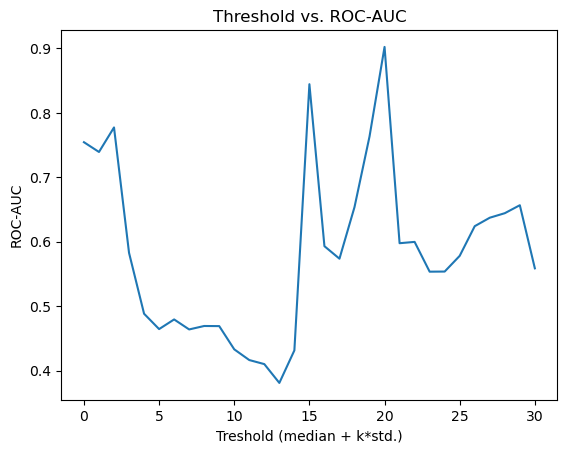

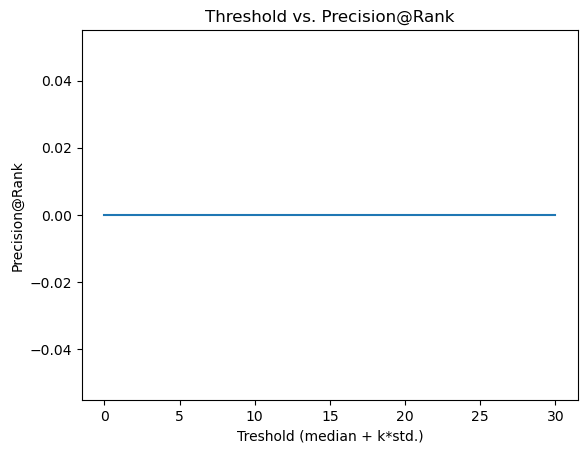

In [66]:
import matplotlib.pyplot as plt

def plot_curve(data, metric_name):
    keys = [i for i in range(31)]
    values = list(data.values())
    
    plt.plot(keys, values)
    plt.xlabel('Treshold (median + k*std.)')
    plt.ylabel(metric_name)
    plt.title('Threshold vs. '+metric_name)
    # plt.grid(True)  # 加入網格線
    plt.show()

plot_curve(auc_dict, "ROC-AUC")
plot_curve(precision_n_dict, "Precision@Rank")
